# IST 718 - Final Project

# Beer Recommendation System

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Project Data Set 

In [2]:
#Read in project file
filename = 'beeradvocate.txt'

In [3]:
#Parse file and create a dataframe
import re

def parse_my_file(filename):
    with open(filename, encoding='utf8') as f:
        for l in f:
            line = l.rstrip()
            if line:
                yield re.split(':', line.strip(),1)
    f.close()
my_parser = parse_my_file(filename)
columns = ['category', 'value']
df = pd.DataFrame(my_parser, columns=columns)

#Strip leading white space from value column
df['value'] = df['value'].map(lambda x: x.strip())

In [4]:
#Create a dataframe based on review time ID
reviewID = df[ (df.category == 'beer/name') ]

In [5]:
#Assign index values for review time based upon order of appearance
reviewID = reviewID.reset_index().reset_index()

In [6]:
#Rename column level_0 to id
reviewID.rename(columns={'level_0':'id'}, inplace=True)
reviewID['id'] = reviewID['id'] +1

In [7]:
#Drop index column
reviewID = reviewID.drop(columns=['value', 'category'])

In [8]:
df.reset_index(inplace=True)

In [9]:
#Merge with original data frame
df = pd.merge(df, reviewID, how='left' , on=['index'])

In [10]:
#Fill NA values with correct id
df['id'].fillna(method='ffill', inplace = True)

#Convert id to int64
df['id'] = df['id'].astype('int64')

In [11]:
#Pivot into a dataframe
df = df.pivot(index='id', columns='category', values='value').reset_index()

In [12]:
df.tail(10)

category,id,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/profileName,review/taste,review/text,review/time
1586604,1586605,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,4.5,4.5,4,3.5,njmoons,3.5,"Let me start by saying, I have (or had) never ...",1288890206
1586605,1586606,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,5,5,5,5,NyackNicky,5,"My first review, and my first beer at Defiant....",1163291143
1586606,1586607,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,4,4.5,5,5,blitheringidiot,5,Never has a beer struck me in such a way that ...,1162871808
1586607,1586608,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,4.5,5,5,5,PopeDX,4.5,What a fantastic pumpkin beer! Probably my mos...,1162865640
1586608,1586609,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,4,4,3.5,3.5,treehugger02010,3,My buddy got a growler from the Defiant Brewin...,1162685856
1586609,1586610,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,3.5,4,5,4,maddogruss,4,If you're looking for a quality beer right alo...,1162684892
1586610,1586611,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,2.5,5,4,2,yelterdow,4,Growler fill from the long-awaited Defiant Bre...,1161048566
1586611,1586612,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,3,3.5,4.5,3.5,TongoRad,4,This was served from a growler and I suspect a...,1160702513
1586612,1586613,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,4.5,4.5,4,4.5,dherling,4.5,"Ah, the horseman commeth. Cloudy chocolate bro...",1160023044
1586613,1586614,5.20,33061,14359,The Horseman's Ale,Pumpkin Ale,4.5,4.5,5,4.5,cbl2,4.5,10/4/2006\t$7.50 5.20% Fresh on tap. \t\tAppea...,1160005319


In [13]:
df.shape

(1586614, 14)

## Data Clean-Up

In [14]:
#Replace blank spaces with Nulls
df.replace('', np.nan, regex=False, inplace=True)

In [15]:
#Count number of Na's
df.isna().sum()

category
id                        0
beer/ABV              67785
beer/beerId               0
beer/brewerId             0
beer/name                 0
beer/style                0
review/appearance         0
review/aroma              0
review/overall            0
review/palate             0
review/profileName      348
review/taste              0
review/text             353
review/time               0
dtype: int64

In [16]:
df[df['beer/name'] == 'Megalodon']

category,id,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/profileName,review/taste,review/text,review/time
910,911,NaN,64803,2724,Megalodon,American Strong Ale,3,1.5,1,2.5,womencantsail,1.5,On-tap at Pacific Coast\t\tThere's pretty much...,1293559076


Profile name andentries without text reviews are fine. We may want to look at exploring the beer ABV nulls however.

In [17]:
#Drop user profilenames that are nulls
df = df.dropna(subset=['review/profileName'])

In [18]:
df[df['beer/ABV'].isnull()].head()

category,id,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/profileName,review/taste,review/text,review/time
267,268,NaN,21241,1075,Cauldron Espresso Stout,American Stout,3,3,3,4,RedDiamond,3,Strong hop bittering married to a coffee-enhan...,1103668195
718,719,NaN,54723,1075,Alpha Beta,American IPA,4,4,4,4,plaid75,4,Poured a deep copper hue with a one and a half...,1260673921
781,782,NaN,42964,1075,Imperial Stout,American Double / Imperial Stout,4,4.5,4.5,4,grumpy,4.5,"On tap at Concordia Alehouse in Portland, OR. ...",1212201268
910,911,NaN,64803,2724,Megalodon,American Strong Ale,3,1.5,1,2.5,womencantsail,1.5,On-tap at Pacific Coast\t\tThere's pretty much...,1293559076
926,927,NaN,41584,2724,Holiday Trappist Style Ale,Belgian Strong Pale Ale,1.5,2,1.5,1,JDV,3,"Bottle shared with Fly, Dewbrewer, Humulone_Re...",1205614154


So what we will do, is impute null values based upon the average ABV by beer/style. To do that, we need to create a dataframe of non-nulls.

In [19]:
#Convert ABV to float
df['beer/ABV'] = df['beer/ABV'].astype('float64')

#Apply style ABV averages to missing ABV values
df['beer/ABV'] = df.groupby(['beer/style'])['beer/ABV'].apply(lambda x: x.fillna(x.mean()))

#Check number of missing values
df.isna().sum()

category
id                      0
beer/ABV                0
beer/beerId             0
beer/brewerId           0
beer/name               0
beer/style              0
review/appearance       0
review/aroma            0
review/overall          0
review/palate           0
review/profileName      0
review/taste            0
review/text           353
review/time             0
dtype: int64

So we no longer have any missing ABV values, so we are good to go. Next we will convert our data to the appropriate data types.

In [20]:
#Change type for review columns to numeric
reviewCols = ['review/appearance', 'review/aroma', 'review/overall', 'review/palate', 'review/taste']
df[reviewCols] = df[reviewCols].apply(pd.to_numeric)
df['beer/beerId'] = df['beer/beerId'].astype('object')
df['beer/brewerId'] = df['beer/brewerId'].astype('object')

#Add a Brewer/Beer ID
df['beer/brewerbeerId'] = df['beer/brewerId'].astype(str) + '-' + df['beer/beerId'].astype(str) 

In [21]:
df.dtypes

category
id                      int64
beer/ABV              float64
beer/beerId            object
beer/brewerId          object
beer/name              object
beer/style             object
review/appearance     float64
review/aroma          float64
review/overall        float64
review/palate         float64
review/profileName     object
review/taste          float64
review/text            object
review/time            object
beer/brewerbeerId      object
dtype: object

Next, we are going to reclassify our beer styles.

In [22]:
#Upload Beer Hierarchy
hierarchy = pd.read_csv('beerHierarchy.csv', delimiter = ',', encoding ='latin-1')

In [23]:
hierarchy.head()

,beer/style,beer/category,beer/sub-category
0,Hefeweizen,MIXED STYLE,GERMAN WHEAT AND RYE BEER
1,English Strong Ale,ALE,STRONG ALE
2,Foreign / Export Stout,ALE,STOUT
3,German Pilsener,LAGER,PILSENER
4,American Double / Imperial IPA,ALE,INDIA PALE ALE


In [24]:
#Merge with original data frame
df = pd.merge(df, hierarchy[['beer/style', 'beer/category', 'beer/sub-category']], how='left' , on='beer/style')

In [25]:
#Count number of Na's
df.isna().sum()

id                      0
beer/ABV                0
beer/beerId             0
beer/brewerId           0
beer/name               0
beer/style              0
review/appearance       0
review/aroma            0
review/overall          0
review/palate           0
review/profileName      0
review/taste            0
review/text           353
review/time             0
beer/brewerbeerId       0
beer/category           0
beer/sub-category       0
dtype: int64

In [26]:
#Remove /t from review text
df['review/text'] = df['review/text'].str.replace('\t', '')

Next, we will assign unique user ids to each user.

In [27]:
#Assign ids to each user
df = df.assign(userid=df['review/profileName'].astype('category').cat.codes)

#Assign ids to each beer
df = df.assign(beerid=df['beer/brewerbeerId'].astype('category').cat.codes)

In [28]:
df['beer/beerId'].nunique()

66051

## Exploratory Data Analysis

About our data....

#### Number of Unique Beers

In [29]:
beerCount = df['beer/brewerbeerId'].nunique()
print('Total number of unique beers for analysis is: {:d}'.format(beerCount))

Total number of unique beers for analysis is: 66051


#### Number of Unique Breweries

In [30]:
brewerCount = df['beer/brewerId'].nunique()
print('Total number of unique breweries for analysis is: {:d}'.format(brewerCount))

Total number of unique breweries for analysis is: 5840


#### Number of Unique Styles

In [31]:
stylecount = df['beer/style'].nunique()
print('Total number of unique beer styles for analysis is: {:d}'.format(stylecount))

Total number of unique beer styles for analysis is: 104


#### Number of Unique Style Categories

In [32]:
stylecount = df['beer/category'].nunique()
print('Total number of unique beer style categories for analysis is: {:d}'.format(stylecount))

Total number of unique beer style categories for analysis is: 5


#### Number of Unique Style Sub-Categories

In [33]:
stylecount = df['beer/sub-category'].nunique()
print('Total number of unique beer style sub-categories for analysis is: {:d}'.format(stylecount))

Total number of unique beer style sub-categories for analysis is: 21


#### Number of Beer Reviews

In [34]:
reviewCount = df['review/time'].nunique()
print('Total number of beer reviews for analysis is: {:d}'.format(reviewCount))

Total number of beer reviews for analysis is: 1577615


#### Number of Users

In [35]:
userCount = df['review/profileName'].nunique()
print('Total number of users with a review for analysis is: {:d}'.format(userCount))

Total number of users with a review for analysis is: 33387


#### Number of Unique Beers/Brewer

In [36]:
print('Total number of unique beers per brewer is: {:.0f}'.format(beerCount/brewerCount))

Total number of unique beers per brewer is: 11


#### Reviews

##### Overall

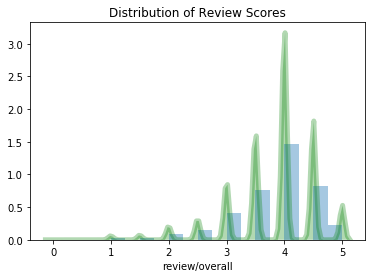

In [37]:
#Distribution of reviews
sns.distplot(df['review/overall'], bins=20, hist=True, kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True }
)
plt.title('Distribution of Review Scores')
plt.show()

##### Appearance, Aroma, Palate, and Taste

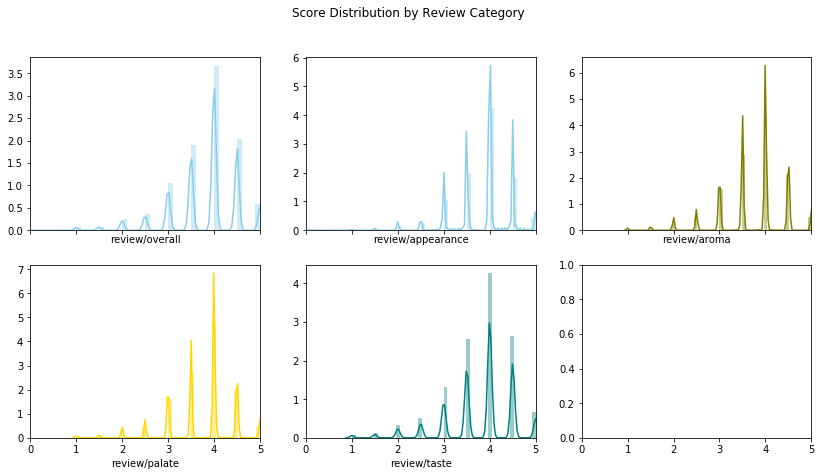

In [38]:
f, axes = plt.subplots(2, 3, figsize=(14, 7), sharex=True)
sns.distplot( df["review/overall"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["review/appearance"] , color="skyblue", ax=axes[0, 1])
sns.distplot( df["review/aroma"] , color="olive", ax=axes[0, 2])
sns.distplot( df["review/palate"] , color="gold", ax=axes[1, 0])
sns.distplot( df["review/taste"] , color="teal", ax=axes[1, 1])
plt.suptitle("Score Distribution by Review Category")
plt.xlim(0, 5)
plt.show()

Scores, no matter the reveiew category, tend to skew higher.

In [39]:
numberOfRatings = pd.DataFrame(df.groupby(['review/overall'])['review/profileName'].count().reset_index())
numberOfRatings.columns = ['rating', 'number_of_reviews']

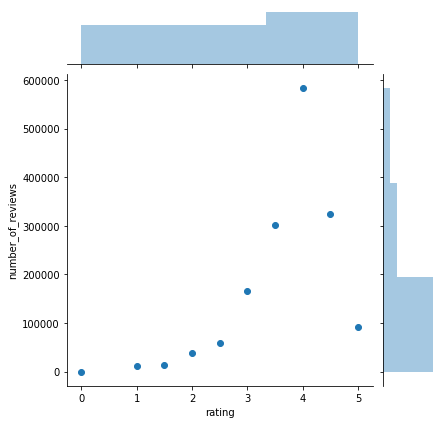

In [40]:
sns.jointplot(x='rating', y='number_of_reviews', data=numberOfRatings)

#### Number of Reviews by Beer Type

In [41]:
styleCategoryCount = pd.DataFrame(df.groupby(['beer/category'])['review/profileName'].count().sort_values(ascending=False)).reset_index()
styleSubCategoryCount = pd.DataFrame(df.groupby(['beer/sub-category'])['review/profileName'].count().sort_values(ascending=False)).reset_index()

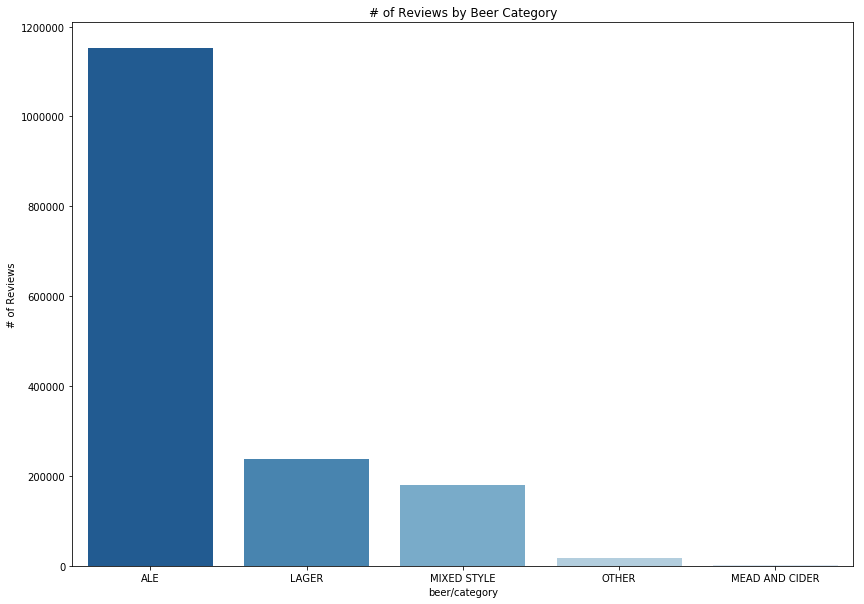

In [42]:
fig=plt.figure(figsize=(14, 10))
sns.barplot(x="beer/category", y="review/profileName", data=styleCategoryCount, palette="Blues_r")
plt.ylabel('# of Reviews')
plt.title('# of Reviews by Beer Category')
plt.show()

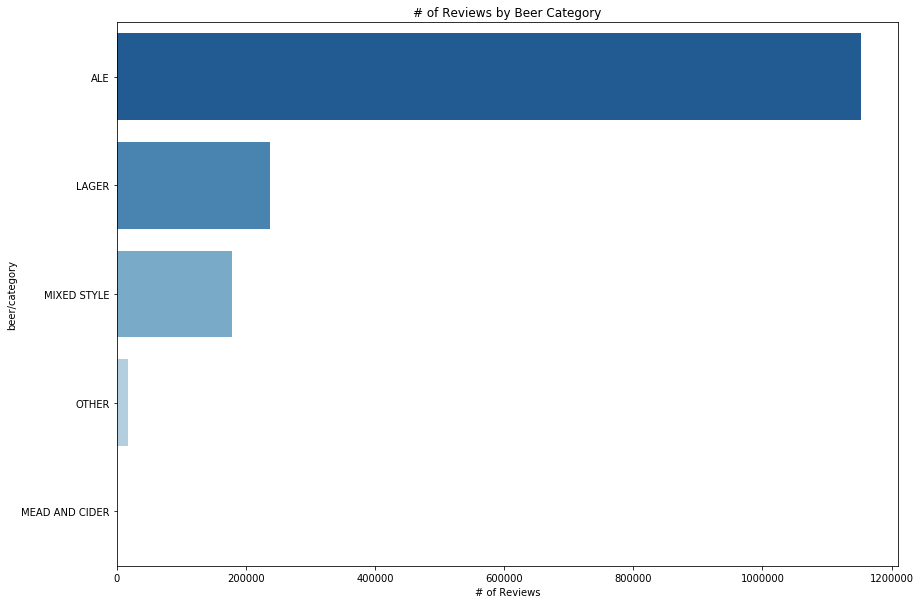

In [43]:
fig=plt.figure(figsize=(14, 10))
sns.barplot(x="review/profileName", y="beer/category", data=styleCategoryCount, palette="Blues_r")
plt.xlabel('# of Reviews')
plt.title('# of Reviews by Beer Category')
plt.show()

In [44]:
styleSubCategoryCount['Percentage'] = styleSubCategoryCount['review/profileName']/styleSubCategoryCount['review/profileName'].sum()

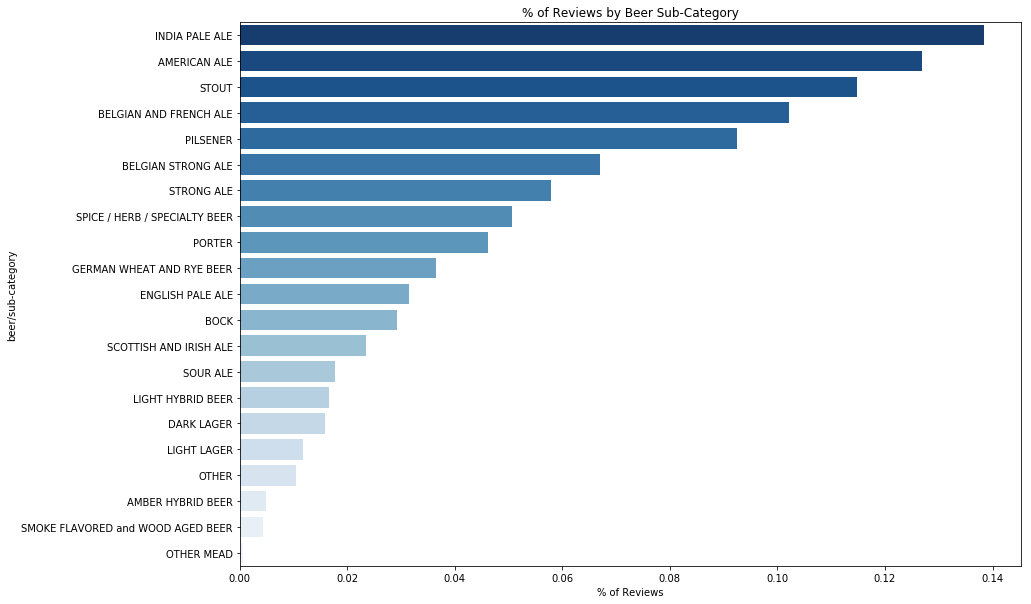

In [45]:
fig=plt.figure(figsize=(14, 10))
sns.barplot(x="Percentage", y="beer/sub-category", data=styleSubCategoryCount, palette="Blues_r")
plt.xlabel('% of Reviews')
plt.title('% of Reviews by Beer Sub-Category')
plt.show()

#### Correlation Matrix

In [46]:
#Feature Set - Correlation 
features = df[['review/overall','review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'beer/ABV']]

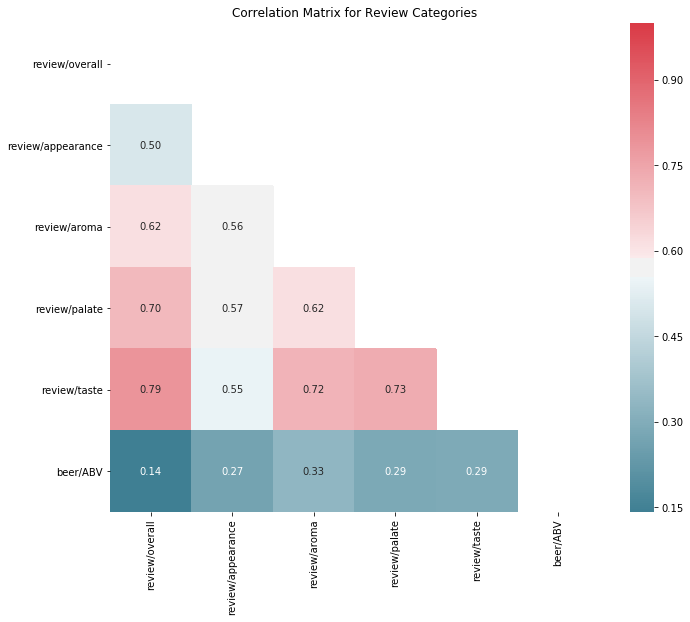

In [47]:
#Let's build a correlation plot to see which scores are correlated
#Compute the correlation matrix
corr = features.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix for Review Categories')
plt.show()

All of the reviews scores tend to be correlated with each other.

#### Distribution of Beer Styles

In [48]:
#Create a dataframe of overall scores
styleScores = df[['beer/category', 'beer/sub-category','beer/ABV','review/overall','review/appearance', 'review/aroma', 'review/palate', 'review/taste']]

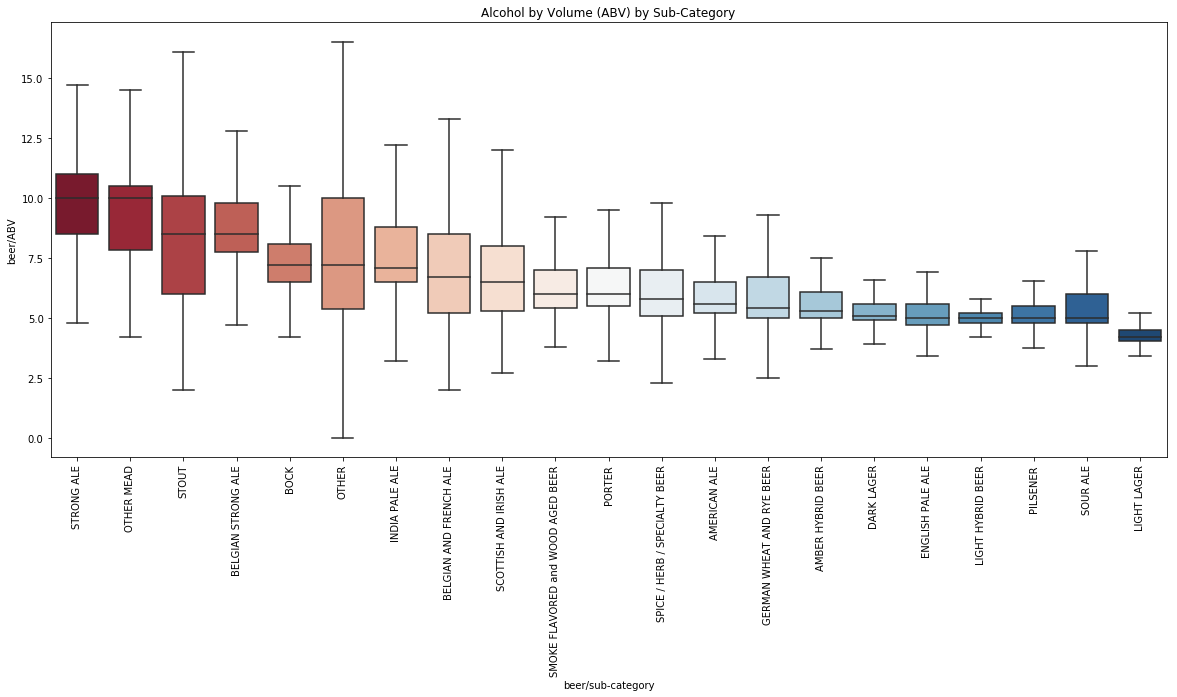

In [49]:
beer_order = styleScores.groupby(by=["beer/sub-category"])["beer/ABV"].median().sort_values(ascending=False).index
fig=plt.figure(figsize=(20, 8))
sns.boxplot(x='beer/sub-category', y='beer/ABV', data=styleScores, showfliers=False, order=beer_order, palette="RdBu")
plt.xticks(rotation=90)
plt.title('Alcohol by Volume (ABV) by Sub-Category')
plt.show()

In [50]:
#Count by Category
CategoryCount = df.groupby(by=["beer/category"])["beer/name"].count().reset_index()
CategoryCount.columns = ['beer/category','totalreviews']
CategoryCountDistinct = df.groupby(by=["beer/category"])["beer/brewerbeerId"].nunique().reset_index()
CategoryCountDistinct.columns = ['beer/category','uniquebeers']
#Median ABV by Category
CategoryABVMedian = df.groupby(by=["beer/category"])["beer/ABV"].median().reset_index()
#Merge two dataframes
CategoryStats = pd.merge(CategoryCount, CategoryABVMedian, how='inner' , on=['beer/category'])
CategoryCounts = pd.merge(CategoryCount, CategoryCountDistinct, how='inner' , on=['beer/category'])

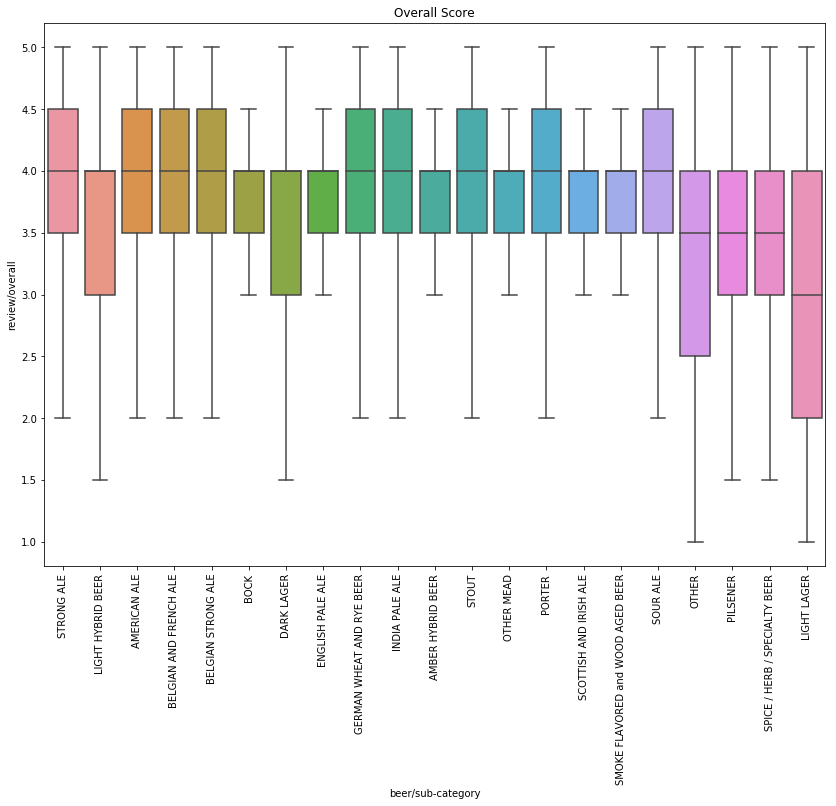

In [51]:
beer_order = styleScores.groupby(by=['beer/sub-category'])['review/overall'].median().sort_values(ascending=False).index
fig=plt.figure(figsize=(14, 10))
sns.boxplot(x='beer/sub-category', y='review/overall', data=styleScores,showfliers=False, order=beer_order)
plt.xticks(rotation=90)
plt.title('Overall Score')
plt.show()

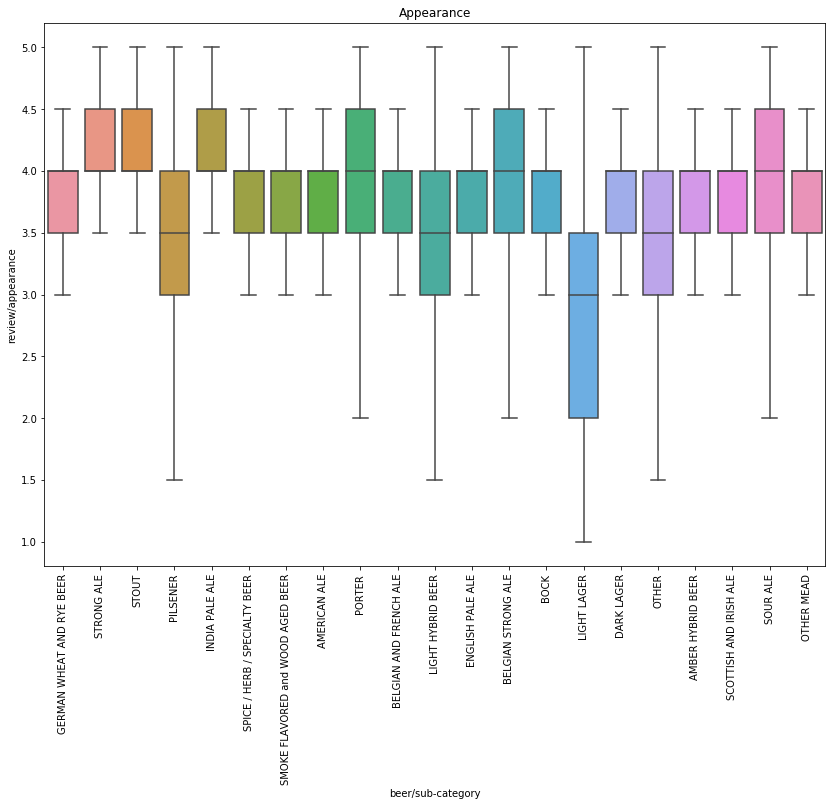

In [52]:
fig=plt.figure(figsize=(14, 10))
sns.boxplot(x='beer/sub-category', y='review/appearance', data=styleScores,showfliers=False)
plt.xticks(rotation=90)
plt.title('Appearance')
plt.show()

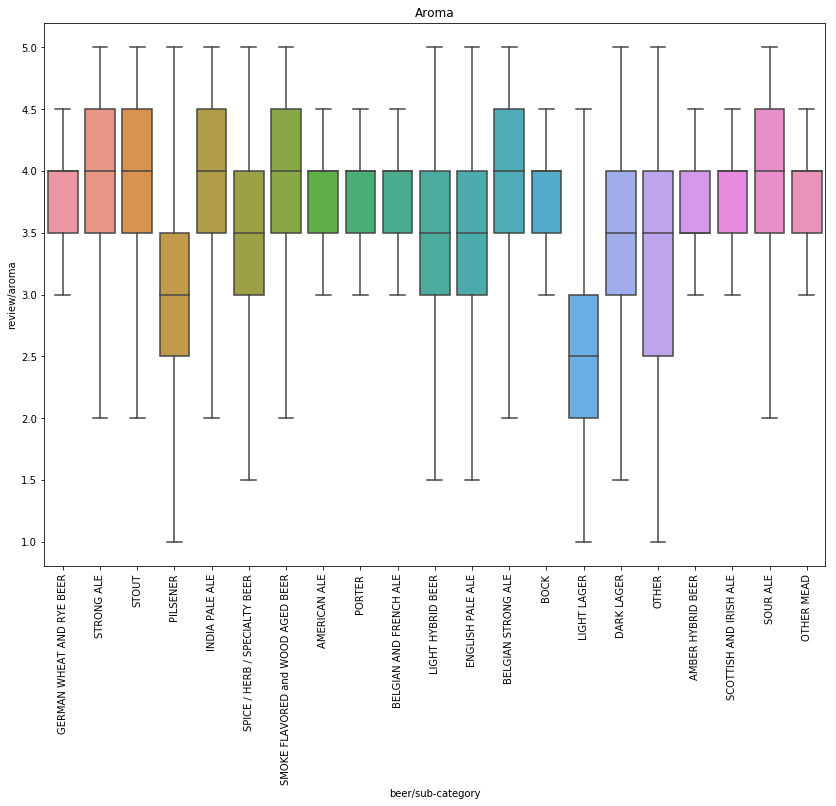

In [53]:
fig=plt.figure(figsize=(14, 10))
sns.boxplot(x='beer/sub-category', y='review/aroma', data=styleScores,showfliers=False)
plt.xticks(rotation=90)
plt.title('Aroma')
plt.show()

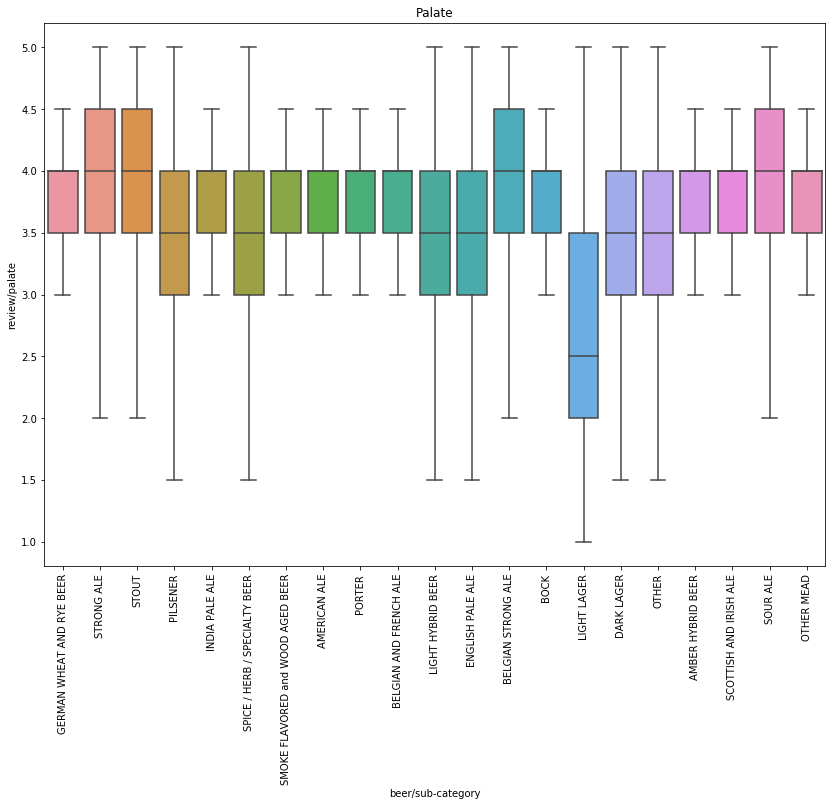

In [54]:
fig=plt.figure(figsize=(14, 10))
sns.boxplot(x='beer/sub-category', y='review/palate', data=styleScores, showfliers=False)
plt.xticks(rotation=90)
plt.title('Palate')
plt.show()

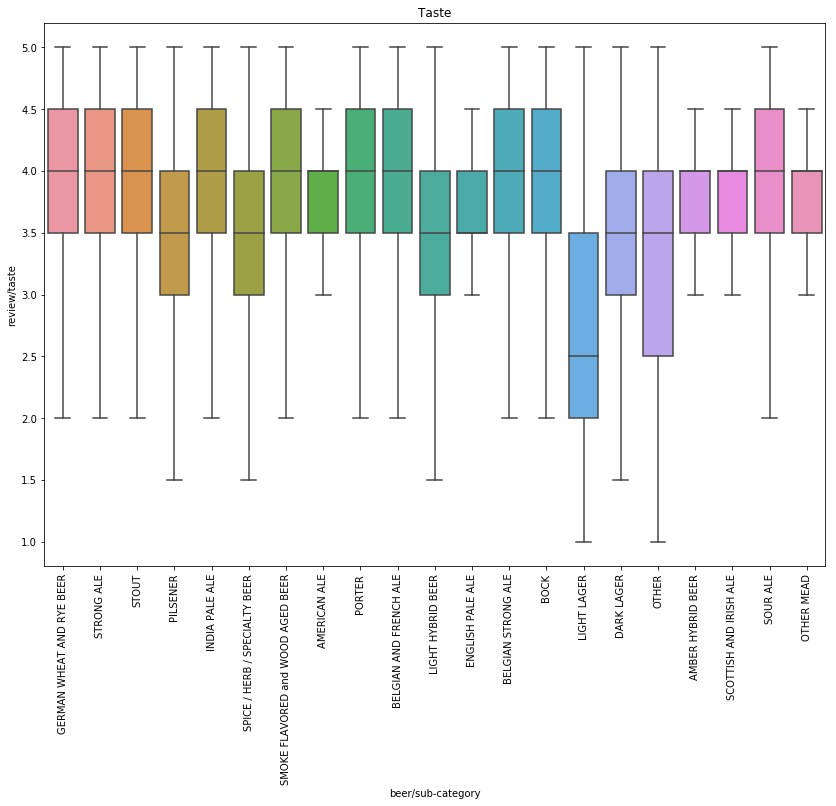

In [55]:
fig=plt.figure(figsize=(14, 10))
sns.boxplot(x='beer/sub-category', y='review/taste', data=styleScores, showfliers=False)
plt.xticks(rotation=90)
plt.title('Taste')
plt.show()

## Model Building

### Content based similarity/recommendations

First, we will look at user based recommendations.

Because each user does not have ratings for every beer, we need to be able to predict ratings based upon the scores provided.

#### User-User Collaborative Filtering

First, we will create a user list

#### User List

In [56]:
#Create a user list (using userid)
users = pd.DataFrame(df.groupby(['userid','review/profileName', 'beer/beerId'])[['review/overall']].mean().reset_index())
userList = users.sort_values(by='userid', ascending=True)

userListFinal = userList[['userid','review/profileName', 'beer/beerId', 'review/overall']].set_index('userid')
userListFinal.columns = ['profileName', 'beerid', 'overall']

In [57]:
#Export User List to csv
userListFinal.to_csv('beerUserData.csv', sep=',')

#### Beer List

In [58]:
content = pd.DataFrame(df.groupby(['beer/name', 'beer/beerId',  'beer/category', 'beer/sub-category'])[['review/overall']].mean().reset_index())
content.columns = ['name', 'beerid', 'category', 'subcategory', 'overall']
beerListFinal = content[['beerid', 'name','category', 'subcategory']].set_index('beerid')

In [59]:
#Export Beer List to csv
beerListFinal.to_csv('beerListFinal_upload.csv', sep=',')

Looking at the matrix, its very sparse. That's okay. We need to fill in the blanks for our user beer review matrix.

### Create Model

Utilizing sparkml, we will build a user based recommendation system.

In [10]:
import ibmos2spark

# @hidden_cell - utilize your spark/IBM credentials
credentials =#hidden
configuration_name = #hidden
bmos = ibmos2spark.bluemix(sc, credentials, configuration_name)

In [11]:
from pyspark import SparkContext
sql = SQLContext(spark)

In [12]:
from pyspark.ml.recommendation import ALS

In [13]:
#Get User Ratings
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook. Get credentials for Spark from IBM
# def get_object_storage_file_with_credentials_c12ec18578414b24a0c0d4f9e45ee656(container, filename)
ratings = pd.read_csv(get_object_storage_file_with_credentials_c12ec18578414b24a0c0d4f9e45ee656('iSchool2UAASpark', 'beerUserData.csv'))
ratings.head()

,userid,profileName,beerid,overall
0,0,007,1002,4.0
1,0,007,1005,5.0
2,0,007,245,4.5
3,0,007,47776,4.0
4,0,007,61351,4.5


In [14]:
#Convert Ratings from Panda DF to Spark DF
ratings = sql.createDataFrame(ratings)

In [15]:
#Import Beer List as Pandas DF
beers = pd.read_csv(get_object_storage_file_with_credentials_c12ec18578414b24a0c0d4f9e45ee656('iSchool2UAASpark', 'beerListFinal_upload.csv'))
beers.head()

,beerid,name,category,subcategory
0,57645,! (Old Ale),ALE,STRONG ALE
1,49236,"""100""",ALE,BELGIAN STRONG ALE
2,50696,"""100"" Pale Ale",ALE,INDIA PALE ALE
3,44353,"""12"" Belgian Golden Strong Ale",ALE,BELGIAN STRONG ALE
4,30080,"""33"" Export",LAGER,LIGHT LAGER


In [16]:
#Convert Beers from Panda DF to Spark DF
beers = sql.createDataFrame(beers)

In [17]:
#View Column types
ratings.printSchema()

root
 |-- userid: long (nullable = true)
 |-- profileName: string (nullable = true)
 |-- beerid: long (nullable = true)
 |-- overall: double (nullable = true)



In [18]:
#View Column types
ratings.printSchema()

root
 |-- userid: long (nullable = true)
 |-- profileName: string (nullable = true)
 |-- beerid: long (nullable = true)
 |-- overall: double (nullable = true)



In [19]:
#Create model using pyspark ALS recommendation library
from pyspark.ml.recommendation import ALS
model = ALS(userCol="userid", itemCol="beerid", ratingCol="overall", implicitPrefs=False, nonnegative=True, rank=4).fit(ratings)

In [20]:
#Make Predictions
predictions = model.transform(ratings)
predictions.show()

+------+------------+------+-------+----------+
|userid| profileName|beerid|overall|prediction|
+------+------------+------+-------+----------+
| 11033|      Shiloh|   148|    3.0| 3.6742322|
| 16386|     bultrey|   148|    4.5| 3.9620113|
| 18944|       drewd|   148|    4.5|   4.07409|
| 32445|  vrazionale|   148|    4.0| 3.9480555|
|   362|    AaronRed|   148|    4.5|  4.221527|
| 10912|        SebD|   148|    4.0| 3.9661984|
| 13022|WalrusJockey|   148|    4.0| 3.6458273|
| 17265|     claytri|   148|    3.0| 3.9562216|
| 23047|   johnwarne|   148|    3.5|  3.750496|
| 24011|  kojevergas|   148|    3.5| 3.0429049|
|  5119|   GnomeKing|   148|    4.0| 3.8667288|
| 13166|     Wildman|   148|    3.5| 3.9779086|
| 13676|   aforbes10|   148|    4.5|  3.831222|
| 22616|     jhu1995|   148|    3.0| 3.6734853|
|  5258|   GreenCard|   148|    4.0| 3.5306132|
|  8053|     Mardukk|   148|    4.0|  3.760328|
| 10063|       Raine|   148|    4.0| 3.8830323|
| 26928|    nortmand|   148|    5.0|  4.

In [21]:
#Calculate the error
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(metricName="rmse", labelCol="overall", predictionCol="prediction")
print( "The root mean squared error for our model is: " + str(evaluator.evaluate(predictions)))

The root mean squared error for our model is: 0.5533183989929725


In [22]:
from pyspark.sql.functions import lit

def recommendBeers(model, user, nbRecommendations):
    # Create a Spark DataFrame with the specified user and all the beers listed in the ratings DataFrame
    dataSet = ratings.select("beerid").distinct().withColumn("userid", lit(user))

    # Create a Spark DataFrame with the beers that have already been rated by this user
    beersAlreadyRated = ratings.filter(ratings.userid == user).select("beerid", "userid")
    topBeers = ratings.filter(ratings.userid == user).select("beerid", "userid", "overall").orderBy("overall", ascending=False).limit(3)
    
    # Apply the recommender system to the data set without the already rated beers to predict ratings
    predict = model.transform(dataSet.subtract(beersAlreadyRated)).dropna().select("beerid", "prediction")
    predict = predict.select("beerid", "prediction").orderBy("prediction", ascending=False).limit(nbRecommendations)
    
    # Join with the movies DataFrame to get the beer names and categories
    recommendations = predict.join(beers, predict.beerid == beers.beerid).select(predict.beerid, beers.name, beers.category, beers.subcategory, predict.prediction)
    profile = ratings.filter(ratings.userid == user).select("userid", "profilename").distinct()
    
    
    profile.show(truncate=False)
    recommendations.show(truncate=False)

### Make Beer Recommendations

In [23]:
# Runs model against beers not rated by the user and calculates potential score based on simple model 
# Returns top five beers based on predicted ratings for selected user ids.

print ("Recommendations for user 32233:")
recommendBeers(model, 32233, 5)
print ("Recommendations for user 10304:")
recommendBeers(model, 10304, 5)
print ("Recommendations for user 32097:")
recommendBeers(model, 32097, 5)

Recommendations for user 32233:
+------+-------------+
|userid|profilename  |
+------+-------------+
|32233 |unskinnyhop09|
+------+-------------+

+------+------------------+-----------+------------------+----------+
|beerid|name              |category   |subcategory       |prediction|
+------+------------------+-----------+------------------+----------+
|54487 |Big Dry Stout     |ALE        |STOUT             |5.183714  |
|12170 |Pale Ale          |ALE        |AMERICAN ALE      |5.0800505 |
|57390 |Red Storm         |ALE        |AMERICAN ALE      |5.183714  |
|47170 |Schwindel Alt     |MIXED STYLE|AMBER HYBRID BEER |5.412324  |
|9137  |Triple Toison D'Or|ALE        |BELGIAN STRONG ALE|5.457131  |
+------+------------------+-----------+------------------+----------+

Recommendations for user 10304:
+------+-----------+
|userid|profilename|
+------+-----------+
|10304 |Rifugium   |
+------+-----------+

+------+---------------------------------+-----------+-----------------------------